In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
# google colab

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# google colab
# DATA_PATH = "/content/drive/MyDrive/Cursos/Valerio_Velardo/Deep_Learning_for_audio/data.json"

# local
DATA_PATH = "G:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\data.json"

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nehem\AppData\Local\Temp\ipykernel_10760\2362305293.py:5: SyntaxWarning: invalid escape sequence '\M'
  DATA_PATH = "G:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\data.json"


In [ ]:
def load_Data(data_path):
  """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
  """

  with open(data_path,"r") as fp:
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["labels"])
  return X,y

def prepare_datasets(test_size, validation_size):
  """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

  # load data
  X,y = load_Data(DATA_PATH)
  # create train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  # create train/validation split
  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

  # add an axis to input sets 3d array -> (130, 13, 1) --> (channel/depth = 1)
  X_train = X_train[..., np.newaxis] # 4d array -> (num_samples, 130, 13, 1)
  X_validation = X_validation[..., np.newaxis]
  X_test = X_test[..., np.newaxis]

  return X_train, X_validation, X_test, y_train, y_validation, y_test

# create network
def build_model(input_shape):
  """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
  """
  # create model
  model = keras.Sequential()
  # 1st conv layer
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))  # (kernels, grid size, activation, input_shape)
  model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')) # (grid size, strides, padding)
  model.add(keras.layers.BatchNormalization())  # proceso matematico complejo normaliza las activaciones de la capa actual, ayuda a hacer mas rapido el entrenamiento
  # 2st conv layer
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
  model.add(keras.layers.BatchNormalization())
  # 3st conv layer
  model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
  model.add(keras.layers.BatchNormalization())
  # flatten output and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  # output layer
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """
    X = X[np.newaxis, ...] #  (130, 13, 1) -> (1, 130, 13, 1)

    # prediction [ [0.1, 0.2, ...] ]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    # extract de index with max value (clasificacion mas probable)
    predicted_index = np.argmax(prediction, axis=1)

    print("Expected index: {}, Predicted label: {}".format(y, predicted_index))

def plot_history(history):
  """Plots accuracy/error for training and validation set based on the history of a model.

    :param history: Training history of model
    :return:
  """
  fig, axs = plt.subplots(2)

  # create accuracy subplot
  axs[0].plot(history.history['accuracy'], label='train accuracy')
  axs[0].plot(history.history['val_accuracy'], label='test accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='lower right')
  axs[0].set_title('Accuracy eval')

  # create error subplot
  axs[1].plot(history.history['loss'], label='train error')
  axs[1].plot(history.history['val_loss'], label='test error')
  axs[1].set_ylabel('Error')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(loc='upper right')
  axs[1].set_title('Error eval')

  plt.show()

g:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\Code\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1839 - loss: 2.6343 - val_accuracy: 0.3772 - val_loss: 1.7976
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3395 - loss: 1.9435 - val_accuracy: 0.4499 - val_loss: 1.5772
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3890 - loss: 1.7531 - val_accuracy: 0.4887 - val_loss: 1.4486
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4423 - loss: 1.5715 - val_accuracy: 0.5214 - val_loss: 1.3524
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4769 - loss: 1.4856 - val_accuracy: 0.5454 - val_loss: 1.2927
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5101 - loss: 1.3982 - val_accuracy: 0.5587 - val_loss: 1.2522
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5202 - loss: 1.3481 - val_accuracy: 0.5614 - val_loss: 1.2067
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5340 - loss: 1.2919 - val_accu

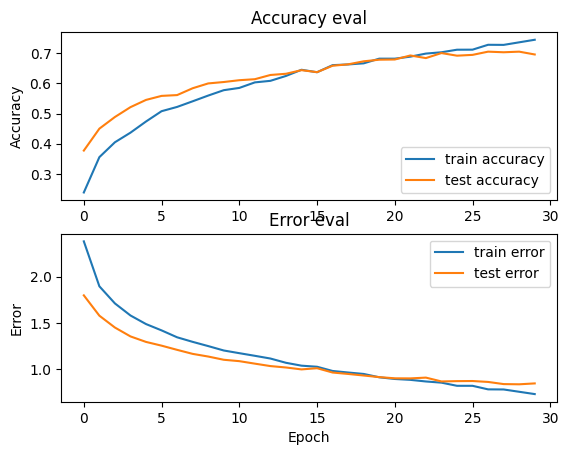

In [ ]:
if __name__ == "__main__":

  # create train, validation and test sets (crossvalidation)
  X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

  # build the CNN net
  input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
  model = build_model(input_shape)

  # compile the network
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

  # train CNN
  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

  # evaluate CNN on the test set
  test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
  print("Accuracy on test set is: {}".format(test_accuracy))

  # make predictions on a sample
  X = X_test[100]
  y = y_test[100]
  predict(model, X, y)

   # plot accuracy and error over the epochs
  plot_history(history)